<a href="https://colab.research.google.com/github/SihomaSa/datauy/blob/main/Trabajo_final_museos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis comparativo de actividades realizadas en los museos Azulejo, Subte y MuHar de Montevideo durante 2023 y 2024**


---
Realizado por Lucía Puppo en el marco del proyecto final de Data Uy


---

## **Objetivo del Proyecto**

El objetivo principal de este proyecto es analizar la distribución y las características de las actividades culturales realizadas en tres importantes museos de Montevideo: el Museo del Azulejo, el Centro de Exposiciones Subte, y el Museo de Historia del Arte (MuHar), durante los años 2023 y 2024.
Este análisis pretende identificar patrones de programación y diversidad cultural dentro de la oferta museística de Montevideo, y, a partir de ello, generar una predicción para el año 2025. Específicamente, se busca examinar el impacto de diversas variables sobre las actividades culturales y el público al que están dirigidas.

+ **Origen de los Datos :**
Los datos empleados para este análisis provienen del portal de Datos Abiertos de la Intendencia de Montevideo. En particular, se utilizaron los conjuntos de datos disponibles en el siguiente enlace: https://ckan.montevideo.gub.uy/dataset/museos .
Para garantizar la representatividad y la calidad del análisis, se ha considerado un período de dos años como referencia (2023 y 2024), dado que los datos disponibles no superan los 50 registros por museo en promedio. Cabe destacar que algunas variables no están completamente reflejadas en todos los museos, lo que ha limitado el alcance de ciertas áreas del análisis.

### **Variables Consideradas en el Estudio**
Para este análisis, se ha seleccionado un conjunto específico de variables que son relevantes para entender la dinámica de las actividades culturales en Montevideo. Las variables clave que se han considerado son:

+ Iniciativa del Museo: Esta variable nos permite diferenciar entre las actividades que son iniciativa del museo y aquellas que forman parte de colaboraciones externas. Es relevante ya que la iniciativa del museo puede influir en el tipo de público que atrae la exposición y en el formato de la actividad (charlas, exposiciones, etc.).

+ Público Destinatario: Una de las variables más importantes, ya que clasifica las actividades según su público objetivo: Todo público, Infancia, Adolescentes etc. Esta categorización es clave para analizar qué tipo de actividades están dirigidas a cada grupo, permitiendo identificar posibles tendencias de acceso y participación de diferentes públicos en los museos.

+ Tipo de Actividad: Este es otro factor fundamental que clasifica las actividades según su naturaleza. Las categorías consideradas incluyen Exposición, Conversatorio, Taller, Espectáculos, Intervención visual, entre otros. Analizar este tipo de actividades en relación con el público destinatario es esencial para identificar si hay una mayor participación de ciertos grupos en actividades específicas.

+ Sobre otras variables que se dejaron de lado que podrían mejorar el trabajo de predicción y ayudar a un mayor analisís fueron:

 **Fecha y duración de la actividad:** debido a que no en todos los data set se encontraba presente la fecha o mes de incio y final, y era dificil de restrear con el tiempo que se tiene para el trabajo.
 **Género de los artistas**: debido a que no estaba presente en todos los data set.

## **Metodología de Análisis**
El análisis se ha estructurado utilizando técnicas estadísticas y de visualización para identificar patrones y relaciones en los datos. Se han realizado los siguientes pasos:

- Limpieza y Preprocesamiento de Datos: Los datos fueron limpiados y estandarizados utilizando la librería Pandas en Python. Las columnas con errores de codificación, como caracteres extraños, fueron corregidas. Además, se estandarizaron las categorías de las variables, como Tipo de Actividad y Público Destinatario, para asegurar que los datos sean coherentes y se puedan analizar de manera efectiva.

- Análisis Descriptivo: Se generaron tablas de contingencia y gráficos de barras para explorar la relación entre el Tipo de Actividad y el Público Destinatario, así como el Tipo de Actividad y la Iniciativa del Museo. Estos análisis proporcionan una visión clara de la distribución de las actividades en función del público y el rol de las iniciativas del museo.

- Análisis Predictivo: Con los datos ya estandarizados, se propone la implementación de modelos de predicción, como el k-Nearest Neighbors (kNN), para predecir la oferta de actividades para el año 2025. Este modelo podrá utilizar las relaciones encontradas en los años 2023 y 2024 para proyectar las actividades más frecuentes y los públicos más propensos a asistir a dichas actividades.

- Análisis del modelo de predicción: Se utilizara una matriz de confusión para analizar si el modelo de clasificación tuvo un correcto rendimiento
La matriz de confusión es una tabla que permite visualizar el rendimiento de un modelo de clasificación, mostrando cuántas predicciones fueron correctas y cuántas incorrectas, dividiendo los errores por clase.
---




A continuación se subiran los dataset a ser utilizados:
* subte_2023.csv
* subte_2024.csv
* muhar_2023.csv
* muhar_2024.csv
* museo-del-azulejo_2023.csv
* museo-del-azulejo_2024.csv


In [1]:
from google.colab import files
import os
# Subir archivos
uploaded = files.upload()

os.listdir('/content/')



Saving muhar_2023.csv to muhar_2023 (1).csv
Saving muhar_2024.csv to muhar_2024 (1).csv
Saving museo-del-azulejo_2023.csv to museo-del-azulejo_2023 (1).csv
Saving museo-del-azulejo_2024.csv to museo-del-azulejo_2024 (1).csv
Saving subte_2023.csv to subte_2023 (1).csv
Saving subte_2024.csv to subte_2024 (1).csv


['.config',
 'muhar_2024 (1).csv',
 'museo-del-azulejo_2023.csv',
 'muhar_2024.csv',
 'muhar_2023.csv',
 'museo-del-azulejo_2024 (1).csv',
 'museo-del-azulejo_2023 (1).csv',
 'subte_2024 (1).csv',
 'museo-del-azulejo_2024.csv',
 'subte_2023.csv',
 'subte_2024.csv',
 'subte_2023 (1).csv',
 'muhar_2023 (1).csv',
 'sample_data']

In [2]:
#Importamos las librerias a usar:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chi-cuadrado
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import statsmodels.api as sm

# kNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



# **Limpieza de Datos:**

---



Antes de realizar cualquier análisis, fue necesario llevar a cabo una limpieza y estandarización de los datos debido a las inconsistencias encontradas en los diferentes conjuntos de datos.

**Limitaciones:** Es importante señalar que los conjuntos de datos utilizados presentan diferencias en sus formatos y valores. Algunos archivos incluyen tanto el mes de inicio como el mes de finalización de las actividades, mientras que otros solo contienen la fecha, o no contienen una de las dos claves (inicio o fin) Debido a esta discrepancia, se decidió no tomar en cuenta la duración de las actividades, ya que los valores inconsistentes dificultan el cálculo preciso de este parámetro.

Transformaciones aplicadas:
* Conversión de Meses: En un inicio se intento calcular la duración de las actividades, como se describio previamente esto fue descartado.

* Correción de caracteres: se aplico una trasnformación a la nomeclatura de los datos para que sean más legibles y comprensibles a la hora de ser analizados y presendatos

* Estandarización de Categorías: Para otras columnas con valores categóricos, como público_destinatario y Actividades, también se realizó un proceso de estandarización. Esto implicó unificar las distintas formas en que se escribían los valores (por ejemplo, "todo público", "adolescentes", etc.), para asegurar que las categorías fueran consistentes a través de todos los datasets.

* Manejo de Valores Nulos y Erróneos: Se eliminaron o imputaron los valores nulos en las columnas clave, como Año, Museo y Actividades, para asegurar que los análisis posteriores fueran precisos y no estuvieran sesgados por la falta de datos. Por ejemplo ciertos dataset no contaban con la columna “museo” pero gracias a que se sabe a qué museo pertenecían se agrego para poder hacer la comparación más fácil. Con la columna *Actividades* se tuvo que tomar en cuenta que en algunos dataset se le denominaba *Actividad*


## **Estandarización de la columna actividad/actividades:**

---




* En primer lugar se cambio el nombre de la columna *actividad* en el dataset  **Muhar_2024** y *actividades* en el dataset **Muhar_2023** que corresponda con la nomeclatura de los demás datasets, para posteriormente seguir con la estandarización de la columna Actividades
 -  Esto incluye eliminar espacios extra en los nombres de las columnas, renombrar la columna a 'Actividades', corregir errores de codificación y estandarizar las categorías de las actividades.
 - Se decidio hacerlo de forma manual debido a que eran dataset con limitada cantidad de datos y para tener un mejor control




In [3]:
# Función para renombrar la columna 'Actividad' a 'Actividades' y estandarizar las categorías
def estandarizar_actividades(df):
    df.columns = df.columns.str.strip()

    if 'Actividad' in df.columns:
        df.rename(columns={'Actividad': 'Actividades'}, inplace=True)
    elif 'actividades' in df.columns:
        df.rename(columns={'actividades': 'Actividades'}, inplace=True)

    df['Actividades'] = df['Actividades'].str.strip().str.lower()

    # Reemplazar los nombres de las categorías mal codificadas
    df['Actividades'] = df['Actividades'].str.replace('exposici¢n', 'exposición')
    df['Actividades'] = df['Actividades'].str.replace('exposiciã³n', 'exposición')
    df['Actividades'] = df['Actividades'].str.replace('Exposiciã³n', 'exposición')
    df['Actividades'] = df['Actividades'].str.replace('act. didã¡cticas', 'act. didacticas')
    df['Actividades'] = df['Actividades'].str.replace('act. did cticas', 'act. didacticas')
    df['Actividades'] = df['Actividades'].str.replace('espectã¡culos', 'Espectáculos')
    df['Actividades'] = df['Actividades'].str.replace('convocatoria pãºblica', 'convocatoria pública')
    df['Actividades'] = df['Actividades'].str.replace('taller y/o  seminario', 'taller y/o seminario')
    df['Actividades'] = df['Actividades'].str.replace('intervensiã³n visual', 'ntervención visual')
    df['Actividades'] = df['Actividades'].str.replace('visita guiada', 'visita guiada')
    df['Actividades'] = df['Actividades'].str.replace('convocatoria p£blica', 'convocatoria pública')
    df['Actividades'] = df['Actividades'].str.replace('act. did\xa0cticas', 'act. didácticas')
    df['Actividades'] = df['Actividades'].str.replace('danza \xa0rabe', 'danza árabe')
    df['Actividades'] = df['Actividades'].str.replace('Vvsita/recorrido guiado', 'visita/Recorrido guiado')



    # Estandarizar las categorías de la columna 'Actividades'
    df['Actividades'] = df['Actividades'].str.strip().str.lower().replace({
        'exposición': 'exposición',
        'charla': 'charla',
        'taller': 'taller',
        'conversatorio': 'conversatorio',
        'act. didacticas': 'act. didacticas',
        'ciclo de conferencias': 'charla'
    }).str.capitalize()  # Convertir a mayúsculas la primera letra de cada palabra

    return df

# Cargar los archivos CSV
subte_2023 = pd.read_csv('/content/subte_2023.csv', encoding='latin-1')
subte_2024 = pd.read_csv('/content/subte_2024.csv', encoding='latin-1')
muhar_2023 = pd.read_csv('/content/muhar_2023.csv', encoding='latin-1')
muhar_2024 = pd.read_csv('/content/muhar_2024.csv', encoding='latin-1')
azulejo_2023 = pd.read_csv('/content/museo-del-azulejo_2023.csv', encoding='latin-1')
azulejo_2024 = pd.read_csv('/content/museo-del-azulejo_2024.csv', encoding='latin-1')

# Aplicar la estandarización a los DataFrames
subte_2023 = estandarizar_actividades(subte_2023)
subte_2024 = estandarizar_actividades(subte_2024)
muhar_2024 = estandarizar_actividades(muhar_2024)
muhar_2023 = estandarizar_actividades(muhar_2023)
azulejo_2023 = estandarizar_actividades(azulejo_2023)
azulejo_2024 = estandarizar_actividades(azulejo_2024)



## Estandarización la columna **publico destinatario**

In [4]:
# Función para corregir los caracteres mal codificados y estandarizar la columna 'público_destinatario'
def estandarizar_publico_destinatario(df):

    df.columns = df.columns.str.strip()

    # Renombrar las columnas si tiene problemas de codificación
    if 'pÃºblico_destinatario' in df.columns:
        df.rename(columns={'pÃºblico_destinatario': 'público_destinatario'}, inplace=True)
    elif 'p£blico_destinatario' in df.columns:
        df.rename(columns={'p£blico_destinatario': 'público_destinatario'}, inplace=True)

    # Verificar que la columna 'público_destinatario' esté correctamente nombrada
    if 'público_destinatario' in df.columns:
        # Convertir la columna 'público_destinatario' a minúsculas
        df['público_destinatario'] = df['público_destinatario'].str.strip().str.lower()

        # Reemplazar los nombres de las categorías mal codificadas
        df['público_destinatario'] = df['público_destinatario'].str.replace('todo pãºblico', 'todo público')
        df['público_destinatario'] = df['público_destinatario'].str.replace('todo p£blico', 'todo público')
        df['público_destinatario'] = df['público_destinatario'].str.replace('situaciã³n de discapacidad', 'situación de discapacidad')



        # Estandarizar las categorías de la columna 'público_destinatario'
        df['público_destinatario'] = df['público_destinatario'].str.strip().str.lower().replace({
          'todo público': 'todo público',
          'infancia': 'infancia',
          'adolescencia': 'adolescencia',
          'adultos': 'adultos',
          'situación de discapacidad': 'situación de discapacidad'
        }).str.capitalize()

        return df

# Aplicar la estandarización a los DataFrames
subte_2023 = estandarizar_publico_destinatario(subte_2023)
subte_2024 = estandarizar_publico_destinatario(subte_2024)
muhar_2023 = estandarizar_publico_destinatario(muhar_2023)
muhar_2024 = estandarizar_publico_destinatario(muhar_2024)
azulejo_2023 = estandarizar_publico_destinatario(azulejo_2023)
azulejo_2024 = estandarizar_publico_destinatario(azulejo_2024)




## Estandarización la columna **iniciativa museo**



In [5]:
def estandarizar_iniciativa_museo(df):
    # Renombrar la columna 'iniciativa_museo' si tiene problemas de codificación
    df.columns = df.columns.str.strip()
    if 'iniciativa_museo' not in df.columns:
        df.rename(columns={df.columns[df.columns.str.contains('iniciativa', case=False)].tolist()[0]: 'iniciativa_museo'}, inplace=True)
    return df
subte_2023 = estandarizar_iniciativa_museo(subte_2023)
subte_2024 = estandarizar_iniciativa_museo(subte_2024)
muhar_2023 = estandarizar_iniciativa_museo(muhar_2023)
muhar_2024 = estandarizar_iniciativa_museo(muhar_2024)
azulejo_2023 = estandarizar_iniciativa_museo(azulejo_2023)
azulejo_2024 = estandarizar_iniciativa_museo(azulejo_2024)



# **Análisis descriptivo**

---



### **Actividades - Publico destinatario**

1. **Creación de tablas de contingencia**:  
   Utilizamos `pd.crosstab()`, una función de pandas que nos permite generar una tabla de contingencia entre dos variables categóricas. En este caso, las variables son **Actividades** y **Público Destinatario**.

2. **Generación de las gráficas**:  
   Usamos **Seaborn** y **Matplotlib** para crear **gráficos de calor (heatmaps)**,  para mostrar visualmente las frecuencias de las combinaciones entre las dos variables. Esto nos permite a identificar rápidamente patrones y tendencias en los datos, como qué actividades tienen más público y cómo varía esto a lo largo de los años.

3. **Prueba de Chi-cuadrado**:  
   Para analizar si existe una relación estadísticamente significativa entre **Actividades** y **Público Destinatario**, usamos la función `chi2_contingency` de **Scipy**. Esta prueba estadística nos da un **chi-cuadrado** y un **p-valor**. Si el **p-valor** es menor a 0.05, rechazamos la hipótesis nula, lo que sugiere que existe una relación significativa entre las actividades y el público al que están dirigidas, de lo contrario se puede decir que son variables independientes.


In [6]:
# Verificar si hay valores nulos en 'Actividades' y 'público_destinatario' para asegurarnos de poder hacer un análisis correcto.
print(subte_2023[['Actividades', 'público_destinatario']].isnull().sum())


Actividades             0
público_destinatario    0
dtype: int64


In [7]:
# Crear la tabla de contingencia para Subte 2023
contingency_subte_2023 = pd.crosstab(subte_2023['Actividades'], subte_2023['público_destinatario'])

# Crear la tabla de contingencia para Subte 2024
contingency_subte_2024 = pd.crosstab(subte_2024['Actividades'], subte_2024['público_destinatario'])

# Crear la tabla de contingencia para MuHar 2023
contingency_muhar_2023 = pd.crosstab(muhar_2023['Actividades'], muhar_2023['público_destinatario'])

# Crear la tabla de contingencia para MuHar 2024
contingency_muhar_2024 = pd.crosstab(muhar_2024['Actividades'], muhar_2024['público_destinatario'])

# Crear la tabla de contingencia para Azulejo 2023
contingency_azulejo_2023 = pd.crosstab(azulejo_2023['Actividades'], azulejo_2023['público_destinatario'])

# Crear la tabla de contingencia para Azulejo 2024
contingency_azulejo_2024 = pd.crosstab(azulejo_2024['Actividades'], azulejo_2024['público_destinatario'])


**A continuación se mostraran graficamente con *HeatMaps* , lo cual muestra la frecuencia con la que ocurren las combinaciones de estas dos variables (Actividades y Público destinatario) en los datos de cada museo.**

## **MuHar 2023 y 2024**

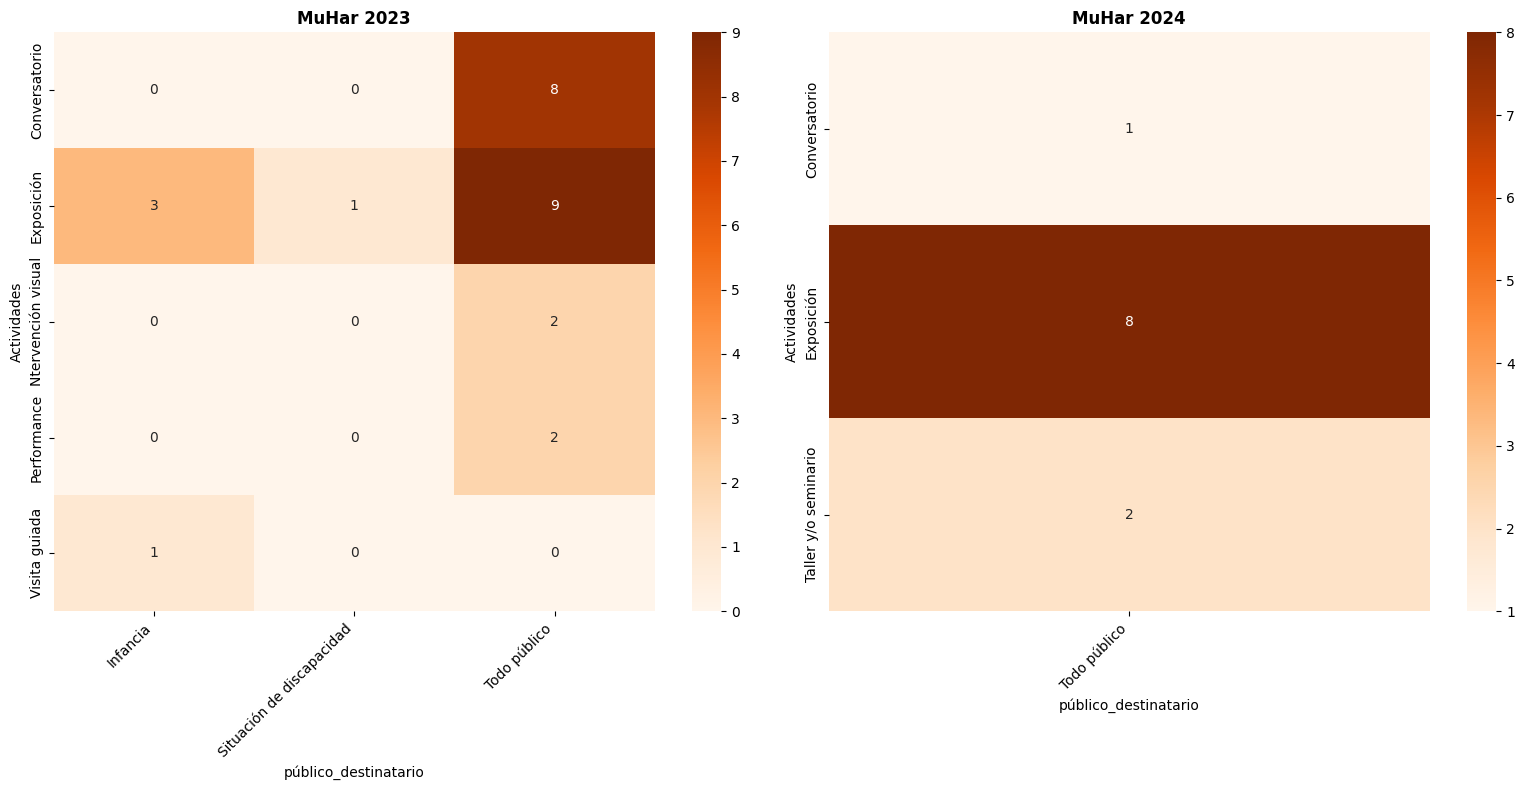

In [8]:

# Crear la figura para MuHar
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Para MuHar 2023
sns.heatmap(pd.crosstab(muhar_2023['Actividades'], muhar_2023['público_destinatario']), annot=True, cmap="Oranges", fmt="d", ax=ax[0])
ax[0].set_title("MuHar 2023", fontweight='bold')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")

# Para MuHar 2024
sns.heatmap(pd.crosstab(muhar_2024['Actividades'], muhar_2024['público_destinatario']), annot=True, cmap="Oranges", fmt="d", ax=ax[1])
ax[1].set_title("MuHar 2024", fontweight='bold')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()



**Análisis:**
- En Muhar 2023 se ve una clara dominancia de las actividades Conversatorios y Exposición con todo público como objetivo, pero tambien se identifican actividades para personas en situación de discapacidad, y activades para infancias.
- En Muhar 2024 en cambio todas las actividades son dirigidas a todo público, siendo predominante la actividad Exposición.

## **Subte 2023 y Subte 2024**

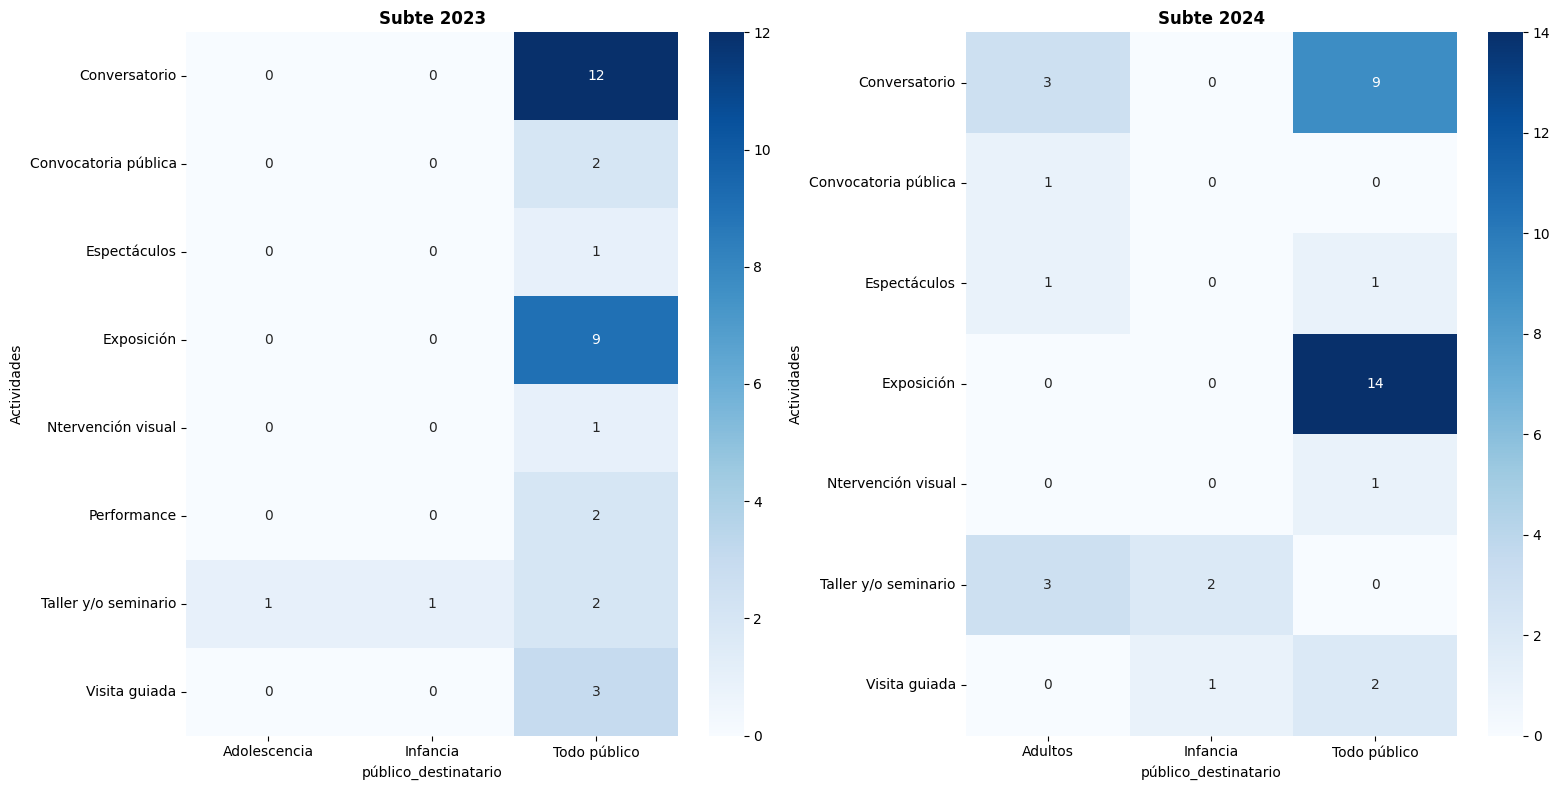

In [9]:
# Crear la figura para Subte
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Para Subte 2023
sns.heatmap(pd.crosstab(subte_2023['Actividades'], subte_2023['público_destinatario']), annot=True, cmap="Blues", fmt="d", ax=ax[0])
ax[0].set_title("Subte 2023", fontweight='bold')

# Para Subte 2024
sns.heatmap(pd.crosstab(subte_2024['Actividades'], subte_2024['público_destinatario']), annot=True, cmap="Blues", fmt="d", ax=ax[1])
ax[1].set_title("Subte 2024", fontweight='bold')

plt.tight_layout()
plt.show()



**Análisis**
- Se muestra como Subte 2023 y 2024 tienen un amplio abanico de actividades.
- Para 2023 Conversatorio y Exposición fueron la mayoria para todo público, pero tambien existio una actividad para infancia y adolescencia, siendo la misma Taller y/o seminario.
- En 2024 si bien se mantiene la proporción del 2023 para Conversatorio y Exposición se muestra una mayor variedad de actividades presentadas para adultos e infancias.

## **Museo del azulejo 2023 y 2024**

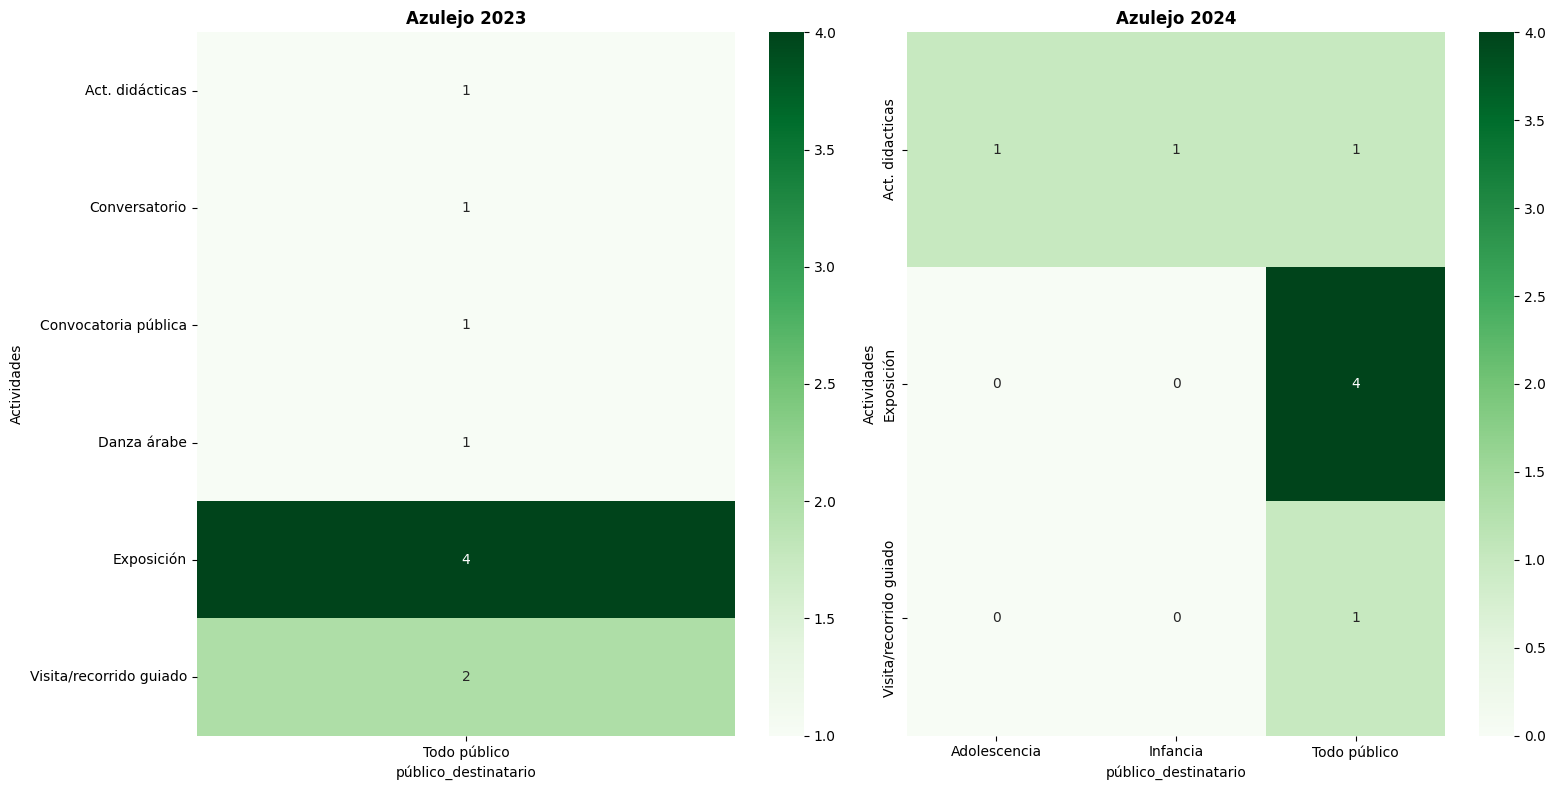

In [10]:
# Crear la figura para Azulejo
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Para Azulejo 2023
sns.heatmap(pd.crosstab(azulejo_2023['Actividades'], azulejo_2023['público_destinatario']), annot=True, cmap="Greens", fmt="d", ax=ax[0])
ax[0].set_title("Azulejo 2023", fontweight='bold')

# Para Azulejo 2024
sns.heatmap(pd.crosstab(azulejo_2024['Actividades'], azulejo_2024['público_destinatario']), annot=True, cmap="Greens", fmt="d", ax=ax[1])
ax[1].set_title("Azulejo 2024", fontweight='bold')

plt.tight_layout()
plt.show()


**Análisis:**
- Se muestra como en 2023 todas las actividades fueron destinadas para todo público, siendo Exposición la más frecuente
- En 2024 hay una mayor variedad, si bien Exposición sigue siendo la actividad más frecuente para todo publico, también se propusieron activades para infancia y adolescencia, siendo esta Actividades didacticas.


**Prueba de *Chi-cuadrado* para poder analizar si existe una relación directa entre las variables actividad y publico destinatario. Se realizaran por museo y por año y se mostrara el resultado.**

In [11]:

# Función para aplicar Chi-cuadrado y mostrar los resultados con formato
def chi2_analysis_with_formatting(contingency_table, museum_name):
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    bold_museum_name = f"\033[1m{museum_name}\033[0m"

    print(f"\nChi-cuadrado para {bold_museum_name}:")
    print(f"Chi-cuadrado: {chi2:.2f}")
    print(f"Grados de libertad: {dof}")
    print(f"P-valor: {p:.4f}")


    if p < 0.05:
        result_color = '\033[92m' #verde
        significance = "Existe una relación significativa"
    else:
        result_color = '\033[91m' #rojo
        significance = "No existe una relación significativa"

    print(f"{result_color}{significance} entre las actividades y el público destinatario en {museum_name}. \033[0m")


# Aplicar el análisis de Chi-cuadrado a cada museo
chi2_analysis_with_formatting(contingency_subte_2023, 'Subte 2023')
chi2_analysis_with_formatting(contingency_subte_2024, 'Subte 2024')
chi2_analysis_with_formatting(contingency_muhar_2023, 'MuHar 2023')
chi2_analysis_with_formatting(contingency_muhar_2024, 'MuHar 2024')
chi2_analysis_with_formatting(contingency_azulejo_2023, 'Azulejo 2023')
chi2_analysis_with_formatting(contingency_azulejo_2024, 'Azulejo 2024')




Chi-cuadrado para Subte 2023:
Chi-cuadrado: 15.94
Grados de libertad: 14
P-valor: 0.3172
No existe una relación significativa entre las actividades y el público destinatario en Subte 2023. 

Chi-cuadrado para Subte 2024:
Chi-cuadrado: 28.78
Grados de libertad: 12
P-valor: 0.0042
Existe una relación significativa entre las actividades y el público destinatario en Subte 2024. 

Chi-cuadrado para MuHar 2023:
Chi-cuadrado: 9.57
Grados de libertad: 8
P-valor: 0.2964
No existe una relación significativa entre las actividades y el público destinatario en MuHar 2023. 

Chi-cuadrado para MuHar 2024:
Chi-cuadrado: 0.00
Grados de libertad: 0
P-valor: 1.0000
No existe una relación significativa entre las actividades y el público destinatario en MuHar 2024. 

Chi-cuadrado para Azulejo 2023:
Chi-cuadrado: 0.00
Grados de libertad: 0
P-valor: 1.0000
No existe una relación significativa entre las actividades y el público destinatario en Azulejo 2023. 

Chi-cuadrado para Azulejo 2024:
Chi-cuadrado: 4.4

## **Actividad vs Iniciativa del museo**

- Creación de tablas de contingencia: Utilizaremos pd.crosstab() para generar tablas de contingencia entre Actividades y Iniciativa del museo.

- Gráficas: Dado que la variable Iniciativa del museo es booleana, en lugar de un heatmap, utilizaremos gráficos de barras para visualizar cuántas actividades están asociadas a la iniciativa del museo en comparación con las que no lo están.

- Prueba de Chi-cuadrado: Al igual que con el análisis de Actividad - Público Destinatario, utilizaremos la función chi2_contingency de scipy para verificar si existe una relación significativa entre las actividades y la iniciativa del museo





In [12]:
# Verificar si hay valores nulos en 'Actividades' y 'iniciativa_museo' para asegurarnos de poder hacer un análisis correcto.
print(subte_2023[['Actividades', 'iniciativa_museo']].isnull().sum())


Actividades         0
iniciativa_museo    0
dtype: int64


In [13]:
# Crear las tablas de contingencia por museo y año
contingency_iniciative_subte_2023 = pd.crosstab(subte_2023['Actividades'], subte_2023['iniciativa_museo'])
contingency_iniciative_subte_2024 = pd.crosstab(subte_2024['Actividades'], subte_2024['iniciativa_museo'])
contingency_iniciative_muhar_2023 = pd.crosstab(muhar_2023['Actividades'], muhar_2023['iniciativa_museo'])
contingency_iniciative_muhar_2024 = pd.crosstab(muhar_2024['Actividades'], muhar_2024['iniciativa_museo'])
contingency_iniciative_azulejo_2023 = pd.crosstab(azulejo_2023['Actividades'], azulejo_2023['iniciativa_museo'])
contingency_iniciative_azulejo_2024 = pd.crosstab(azulejo_2024['Actividades'], azulejo_2024['iniciativa_museo'])

## **MuHar 2023 - 2024**

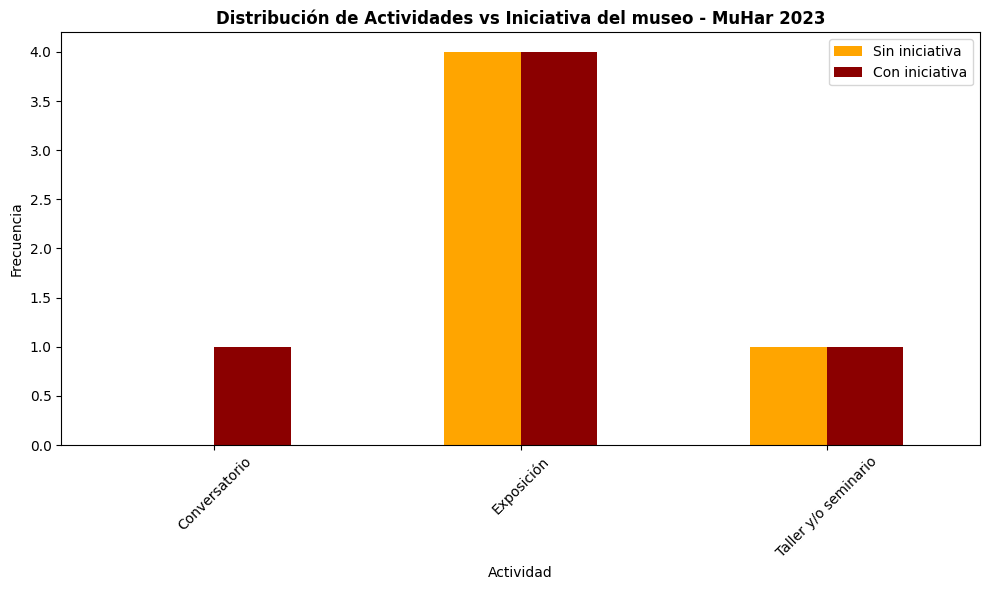

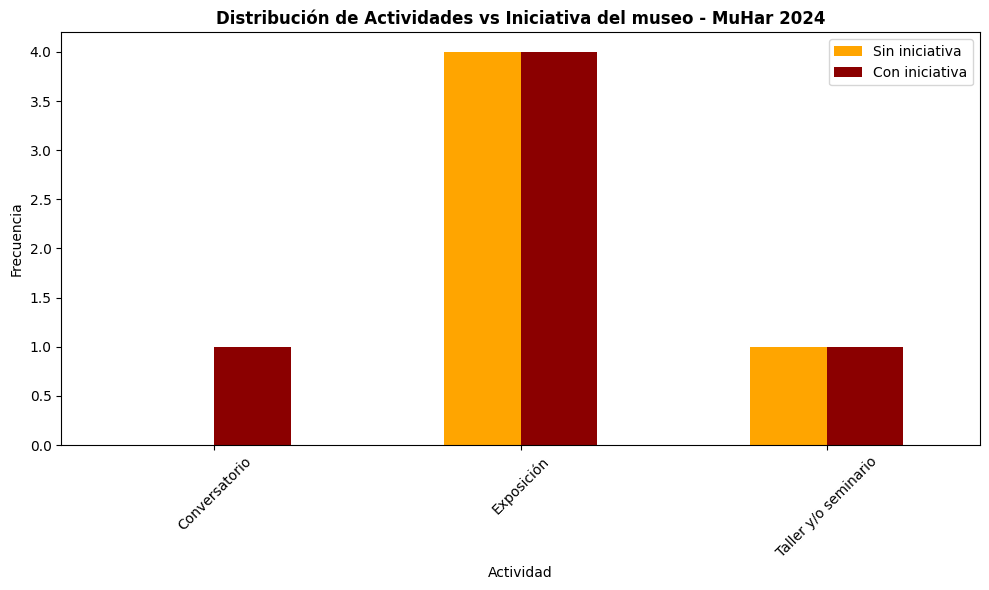

In [14]:

# Función para contar la frecuencia de 'Sí' y 'No' por actividad
def contar_si_no(df, museo_nombre, año):
    # Contar la cantidad de "Sí" y "No" en la columna 'iniciativa_museo' por actividad
    count_table = pd.crosstab(df['Actividades'], df['iniciativa_museo'])

    # Renombrar las columnas para mayor claridad
    count_table.columns = ['Sin iniciativa', 'Con iniciativa']

    #Grafica de comparación "Si" vs "No" para cada actividad
    ax = count_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=['orange', 'darkred'])
    plt.title(f"Distribución de Actividades vs Iniciativa del museo - {museo_nombre} {año}", fontweight='bold')
    plt.xlabel("Actividad")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Mostrar Grafico
contar_si_no(muhar_2024, 'MuHar', 2023)
contar_si_no(muhar_2024, 'MuHar', 2024)




**Análisis:**
Tanto en 2023 como en 2024 en el MuHar se obtuvieron frecuencias de distribución iguales, mostrando principalmente que los conversatorios siempre son con iniciativa del museo, mientras que las exposiciones y los talleres/seminarios son mixtos.

## **Subte 2023 - 2024**

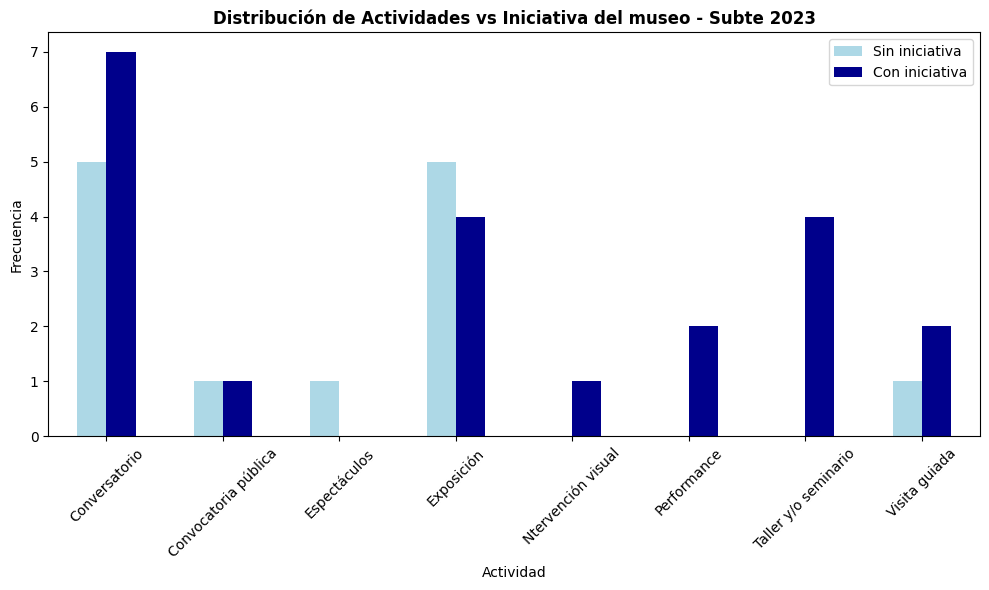

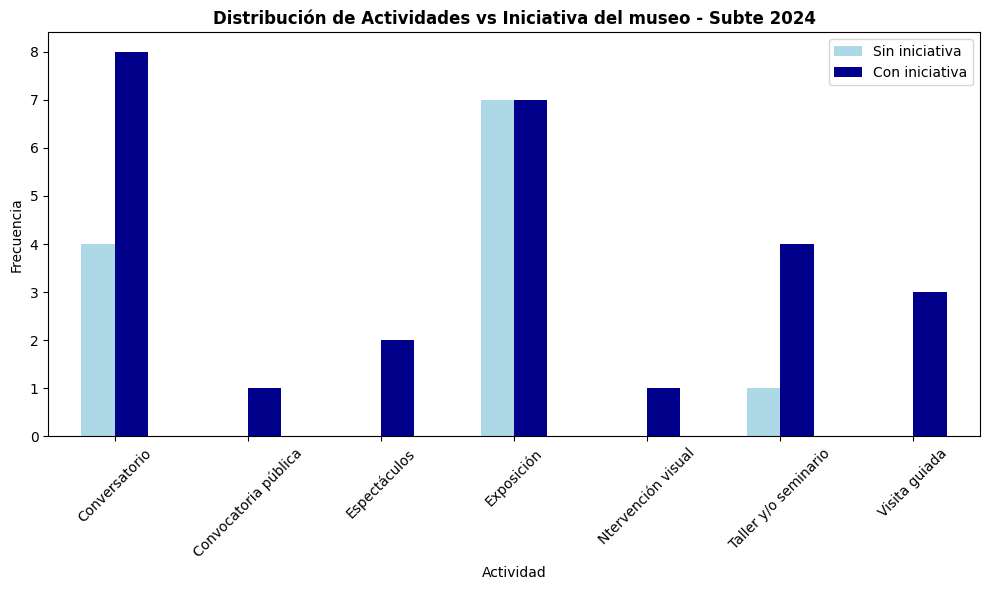

In [15]:

# Función para contar la frecuencia de 'Sí' y 'No' por actividad
def contar_si_no(df, museo_nombre, año):
    # Contar la cantidad de "Sí" y "No" en la columna 'iniciativa_museo' por actividad
    count_table = pd.crosstab(df['Actividades'], df['iniciativa_museo'])

    # Renombrar las columnas para mayor claridad
    count_table.columns = ['Sin iniciativa', 'Con iniciativa']

    #Grafica de comparación "Si" vs "No" para cada actividad
    ax = count_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightblue', 'darkblue'])
    plt.title(f"Distribución de Actividades vs Iniciativa del museo - {museo_nombre} {año}", fontweight='bold')
    plt.xlabel("Actividad")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2, top=0.95)
    plt.tight_layout()
    plt.show()

# Mostrar Grafico
contar_si_no(subte_2023, 'Subte', 2023)
contar_si_no(subte_2024, 'Subte', 2024)




**Análisis:**

Subte 2023:
- La mayor parte de las actividades se realizan con iniciativa del museo, especialmente Conversatorios y Exposiciones.Este patrón sugiere que el museo Subte en 2023 impulsó estas actividades de manera significativa.

Subte 2024:
- Al igual que en 2023, Exposición y Conversatorio siguen siendo las actividades más prominentes, con una clara inclinación hacia con iniciativa del museo ,sin embargo hay una creciente en actividad de tipo Exposición con inciativa de parte del museo en comparación al año anterior.

## **Museo del Azulejo 2023 y 2024**

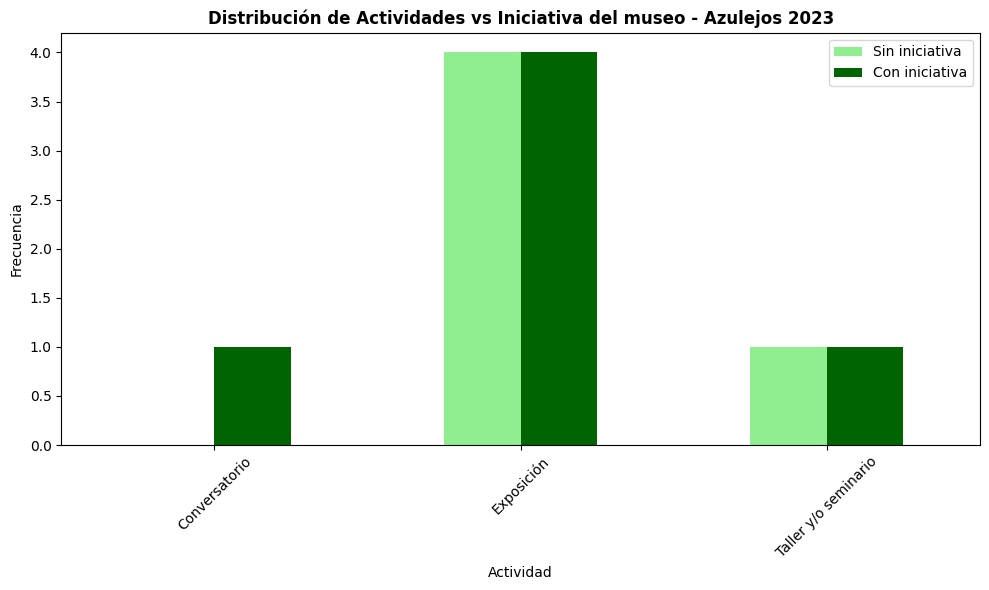

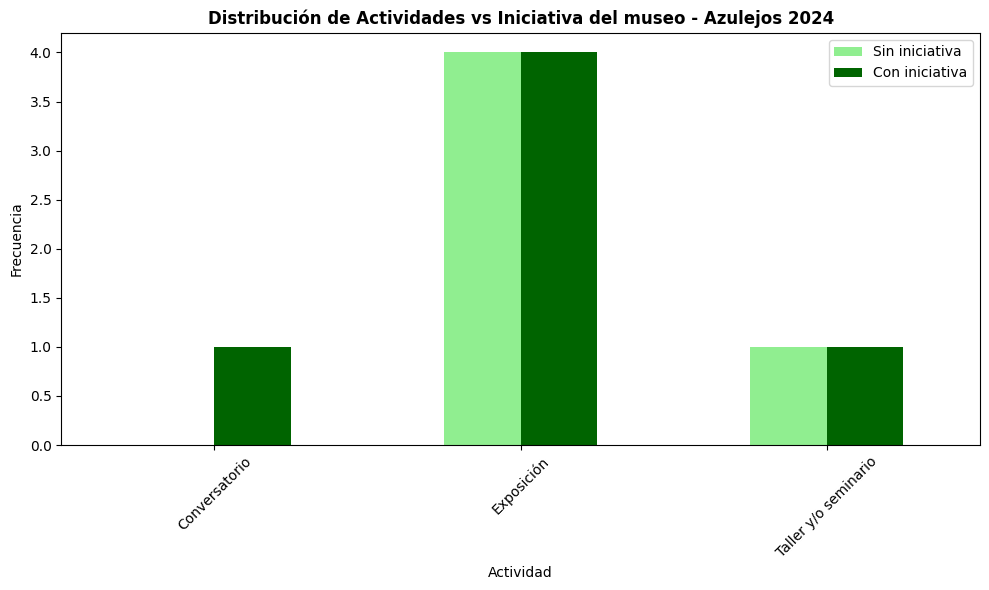

In [16]:
# Función para contar la frecuencia de 'Sí' y 'No' por actividad
def contar_si_no(df, museo_nombre, año):
    # Contar la cantidad de "Sí" y "No" en la columna 'iniciativa_museo' por actividad
    count_table = pd.crosstab(df['Actividades'], df['iniciativa_museo'])

    # Renombrar las columnas para mayor claridad
    count_table.columns = ['Sin iniciativa', 'Con iniciativa']

    #Grafica de comparación "Si" vs "No" para cada actividad
    ax = count_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=['lightgreen', 'darkgreen'])
    plt.title(f"Distribución de Actividades vs Iniciativa del museo - {museo_nombre} {año}", fontweight='bold')
    plt.xlabel("Actividad")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Mostrar Grafico
contar_si_no(muhar_2024, 'Azulejos', 2023)
contar_si_no(muhar_2024, 'Azulejos', 2024)


**Análisis**:
Tanto en Azulejo 2023 como 2024, se da que la mayor actividad con iniciativa del museo son las de tipo exposición, y que en ambos años dentro de las actividades propuestas preodominan las con inicitiva del museo.

### A continuación se aplicara la prueba de **Chi-cuadrado** y se muestran resultados





In [17]:
# Función para aplicar la prueba de Chi-cuadrado
def chi2_analysis_iniciativa(contingency_table, museum_name):
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Resaltar nombre museo
    bold_museum_name = f"\033[1m{museum_name}\033[0m"

    print(f"\nChi-cuadrado para {bold_museum_name}:")
    print(f"Chi-cuadrado: {chi2}")
    print(f"Grados de libertad: {dof}")
    print(f"P-valor: {p}")

    if p < 0.05:
        result_color = '\033[92m'  # verde
        significance = "Existe una relación significativa"
    else:
        result_color = '\033[91m'  # rojo
        significance = "No existe una relación significativa"

    print(f"{result_color}{significance} entre las actividades y el público destinatario en {bold_museum_name}. \033[0m")


# Chi-cuadrado análisis
chi2_analysis_iniciativa(contingency_iniciative_subte_2023, 'Subte 2023')
chi2_analysis_iniciativa(contingency_iniciative_subte_2024, 'Subte 2024')
chi2_analysis_iniciativa(contingency_iniciative_muhar_2023, 'MuHar 2023')
chi2_analysis_iniciativa(contingency_iniciative_muhar_2024, 'MuHar 2024')
chi2_analysis_iniciativa(contingency_iniciative_azulejo_2023, 'Azulejo 2023')
chi2_analysis_iniciativa(contingency_iniciative_azulejo_2024, 'Azulejo 2024')




Chi-cuadrado para Subte 2023:
Chi-cuadrado: 7.299552299552299
Grados de libertad: 7
P-valor: 0.3983710188747665
No existe una relación significativa entre las actividades y el público destinatario en Subte 2023. 

Chi-cuadrado para Subte 2024:
Chi-cuadrado: 5.756837606837606
Grados de libertad: 6
P-valor: 0.4509731629897451
No existe una relación significativa entre las actividades y el público destinatario en Subte 2024. 

Chi-cuadrado para MuHar 2023:
Chi-cuadrado: 1.04
Grados de libertad: 4
P-valor: 0.9036712329146954
No existe una relación significativa entre las actividades y el público destinatario en MuHar 2023. 

Chi-cuadrado para MuHar 2024:
Chi-cuadrado: 0.9166666666666669
Grados de libertad: 2
P-valor: 0.6323366621862497
No existe una relación significativa entre las actividades y el público destinatario en MuHar 2024. 

Chi-cuadrado para Azulejo 2023:
Chi-cuadrado: 0.0
Grados de libertad: 0
P-valor: 1.0
No existe una relación significativa entre las actividades y el públic

# **Análisis predictivo:**
Con los datos ya estandarizados, se  pretenderá la implementación de modelos de predicción, como el k-Nearest Neighbors (kNN), para predecir la oferta de actividades para el año 2025. Este modelo podrá utilizar las relaciones encontradas en los años 2023 y 2024 para proyectar las actividades más frecuentes y los públicos más propensos a asistir a dichas actividades.


---



In [18]:
# Combinar los datos de 2023 y 2024 para cada museo y seleccionar las columnas relevantes
subte_combined = pd.concat([subte_2023[['Actividades', 'público_destinatario', 'iniciativa_museo']],
                            subte_2024[['Actividades', 'público_destinatario', 'iniciativa_museo']]], axis=0)

muhar_combined = pd.concat([muhar_2023[['Actividades', 'público_destinatario', 'iniciativa_museo']],
                             muhar_2024[['Actividades', 'público_destinatario', 'iniciativa_museo']]], axis=0)

azulejo_combined = pd.concat([azulejo_2023[['Actividades', 'público_destinatario', 'iniciativa_museo']],
                               azulejo_2024[['Actividades', 'público_destinatario', 'iniciativa_museo']]], axis=0)

# Preprocesar las columnas relevantes
label_encoder = LabelEncoder()

subte_combined['Actividades'] = label_encoder.fit_transform(subte_combined['Actividades'])
subte_combined['público_destinatario'] = label_encoder.fit_transform(subte_combined['público_destinatario'])

muhar_combined['Actividades'] = label_encoder.fit_transform(muhar_combined['Actividades'])
muhar_combined['público_destinatario'] = label_encoder.fit_transform(muhar_combined['público_destinatario'])

azulejo_combined['Actividades'] = label_encoder.fit_transform(azulejo_combined['Actividades'])
azulejo_combined['público_destinatario'] = label_encoder.fit_transform(azulejo_combined['público_destinatario'])

# Variable objetivo: 'iniciativa_museo'
y_subte = subte_combined['iniciativa_museo']
X_subte = subte_combined[['Actividades', 'público_destinatario']]

y_muhar = muhar_combined['iniciativa_museo']
X_muhar = muhar_combined[['Actividades', 'público_destinatario']]

y_azulejo = azulejo_combined['iniciativa_museo']
X_azulejo = azulejo_combined[['Actividades', 'público_destinatario']]


# Dividir los datos en entrenamiento y prueba para cada museo
X_train_subte, X_test_subte, y_train_subte, y_test_subte = train_test_split(X_subte, y_subte, test_size=0.2, random_state=42)
X_train_muhar, X_test_muhar, y_train_muhar, y_test_muhar = train_test_split(X_muhar, y_muhar, test_size=0.2, random_state=42)
X_train_azulejo, X_test_azulejo, y_train_azulejo, y_test_azulejo = train_test_split(X_azulejo, y_azulejo, test_size=0.2, random_state=42)




## Modelo kNN para MuHar

Precisión del modelo kNN para MuHar: 0.625


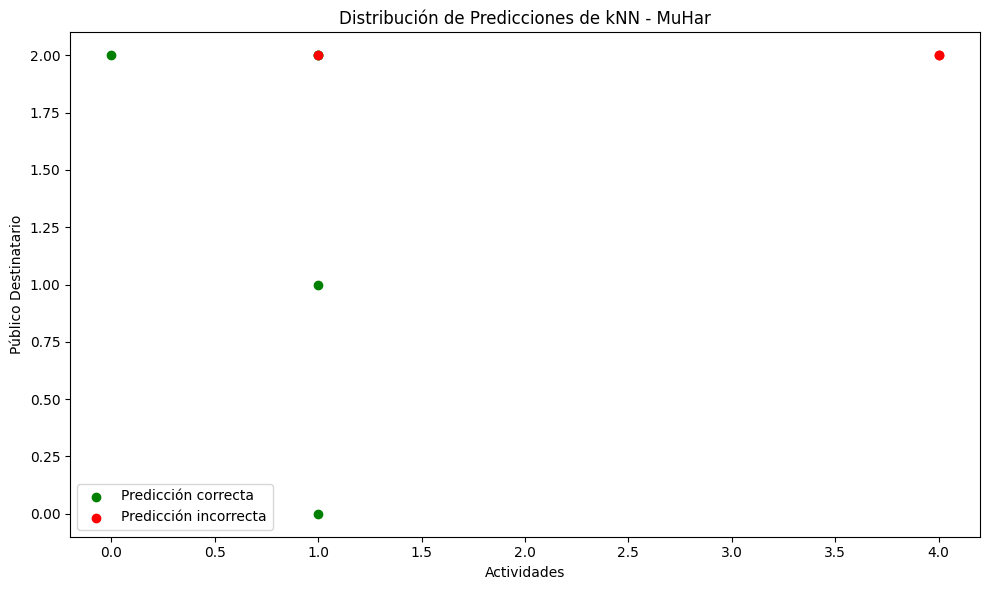

In [19]:

# Modelo kNN para MuHar
knn_muhar = KNeighborsClassifier(n_neighbors=5)
knn_muhar.fit(X_train_muhar, y_train_muhar)
y_pred_muhar = knn_muhar.predict(X_test_muhar)

# Visualización para MuHar
plt.figure(figsize=(10,6))

# Medir la precisión del modelo
print("Precisión del modelo kNN para MuHar:", accuracy_score(y_test_muhar, y_pred_muhar))

# Predicciones correctas (verde)
plt.scatter(X_test_muhar.loc[y_pred_muhar == y_test_muhar, 'Actividades'],
            X_test_muhar.loc[y_pred_muhar == y_test_muhar, 'público_destinatario'],
            color='green', label='Predicción correcta')

# Predicciones incorrectas (rojo)
plt.scatter(X_test_muhar.loc[y_pred_muhar != y_test_muhar, 'Actividades'],
            X_test_muhar.loc[y_pred_muhar != y_test_muhar, 'público_destinatario'],
            color='red', label='Predicción incorrecta')

plt.title('Distribución de Predicciones de kNN - MuHar')
plt.xlabel('Actividades')
plt.ylabel('Público Destinatario')
plt.legend()
plt.tight_layout()
plt.show()

## Modelo kNN para Subte

Precisión del modelo kNN para Subte: 0.5333333333333333


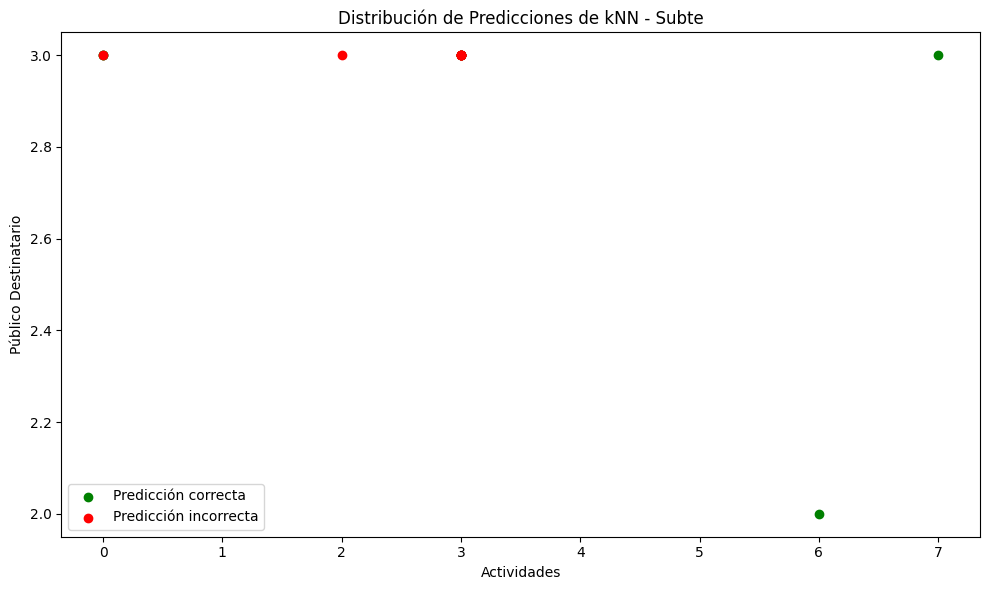

In [20]:
# Crear el modelo kNN para Subte
knn_subte = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn_subte.fit(X_train_subte, y_train_subte)

# Realizar las predicciones
y_pred_subte = knn_subte.predict(X_test_subte)

# Medir la precisión del modelo
print("Precisión del modelo kNN para Subte:", accuracy_score(y_test_subte, y_pred_subte))

# Visualizar las predicciones
plt.figure(figsize=(10,6))

# Predicciones correctas (verde)
plt.scatter(X_test_subte.loc[y_pred_subte == y_test_subte, 'Actividades'],
            X_test_subte.loc[y_pred_subte == y_test_subte, 'público_destinatario'],
            color='green', label='Predicción correcta')

# Predicciones incorrectas (rojo)
plt.scatter(X_test_subte.loc[y_pred_subte != y_test_subte, 'Actividades'],
            X_test_subte.loc[y_pred_subte != y_test_subte, 'público_destinatario'],
            color='red', label='Predicción incorrecta')

plt.title('Distribución de Predicciones de kNN - Subte')
plt.xlabel('Actividades')
plt.ylabel('Público Destinatario')
plt.legend()
plt.tight_layout()
plt.show()


## Modelo kNN para el Museo del Azulejo

Precisión del modelo kNN para Azulejo: 1.0


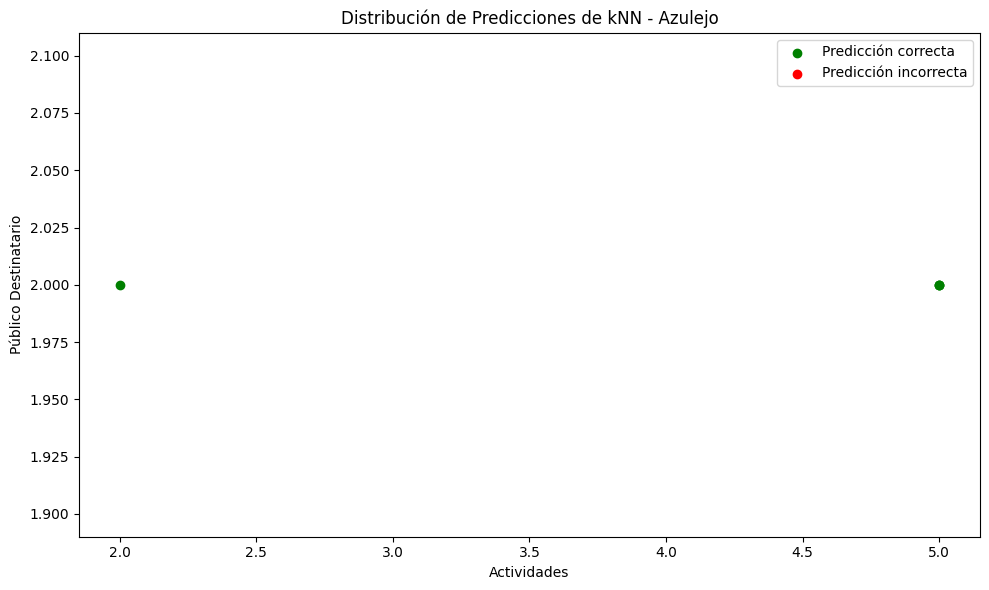

In [21]:
# Crear el modelo kNN para Azulejo
knn_azulejo = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn_azulejo.fit(X_train_azulejo, y_train_azulejo)

# Realizar las predicciones
y_pred_azulejo = knn_azulejo.predict(X_test_azulejo)

# Medir la precisión del modelo
print("Precisión del modelo kNN para Azulejo:", accuracy_score(y_test_azulejo, y_pred_azulejo))

# Visualizar las predicciones correctas e incorrectas
plt.figure(figsize=(10,6))

# Predicciones correctas (verde)
plt.scatter(X_test_azulejo.loc[y_pred_azulejo == y_test_azulejo, 'Actividades'],
            X_test_azulejo.loc[y_pred_azulejo == y_test_azulejo, 'público_destinatario'],
            color='green', label='Predicción correcta')

# Predicciones incorrectas (rojo)
plt.scatter(X_test_azulejo.loc[y_pred_azulejo != y_test_azulejo, 'Actividades'],
            X_test_azulejo.loc[y_pred_azulejo != y_test_azulejo, 'público_destinatario'],
            color='red', label='Predicción incorrecta')

plt.title('Distribución de Predicciones de kNN - Azulejo')
plt.xlabel('Actividades')
plt.ylabel('Público Destinatario')
plt.legend()
plt.tight_layout()
plt.show()


#**Analisís del modelo de predicción**
Se utilizara una matriz de confusión para analizar si el modelo de clasificación tuvo un correcto rendimiento
### Matriz de Confusión:
Se compone de cuatro elementos clave:

- Verdaderos Positivos (TP): El número de veces que el modelo predijo correctamente una clase positiva.

- Falsos Positivos (FP): El número de veces que el modelo predijo incorrectamente una clase positiva.

- Falsos Negativos (FN): El número de veces que el modelo predijo incorrectamente una clase negativa.

- Verdaderos Negativos (TN): El número de veces que el modelo predijo correctamente una clase negativa.


## MuHar 2023 y 2024

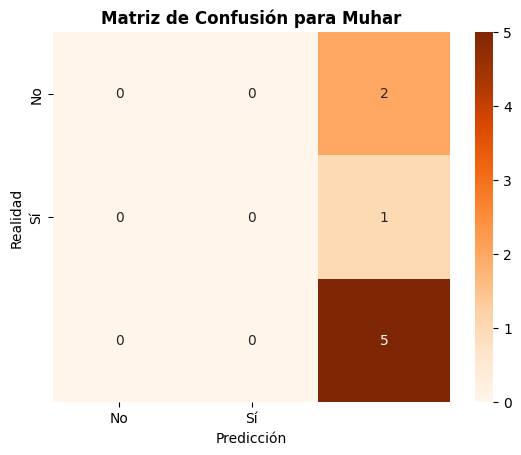

In [22]:
conf_matrix = confusion_matrix(y_test_muhar, y_pred_muhar)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión para Muhar', fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


**Analisís:**La matriz de confusión muestra que hubo 2 predicciones incorrectas (2 "Sí" predichos como "No") y 5 predicciones correctas (5 "Sí" predichos correctamente). Las predicciones correctas son aquellas actividades donde se acertó al clasificar correctamente el público destinatario.

El modelo parece funcionar correctamente en términos generales, presentando algunos errores, lo que puede reflejar la falta de diversidad en los datos o el poco volumen en los datos del año 2023.

## Subte 2023 y 2024

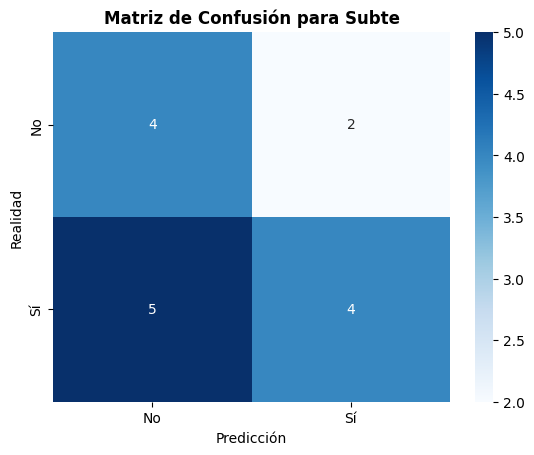

In [23]:

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_subte, y_pred_subte)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión para Subte', fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()




**Analisís**: La matriz de confusión muestra 4 predicciones correctas de "No" y 4 de "Sí", y 2 predicciones incorrectas (2 "No" predichos como "Sí").

Esto sugiere que el modelo tiene un rendimiento mixto. Aunque predice correctamente el público destinatario en algunas ocasiones, existe un número considerable de errores. Esto puede deberse a la alta diversidad en actividades que presenta el museo, a que sea necesario mejorar el modelo con mayores datos, o bien una mezcla de ambos.

## Museo del Azulejo 2023 y 2024

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


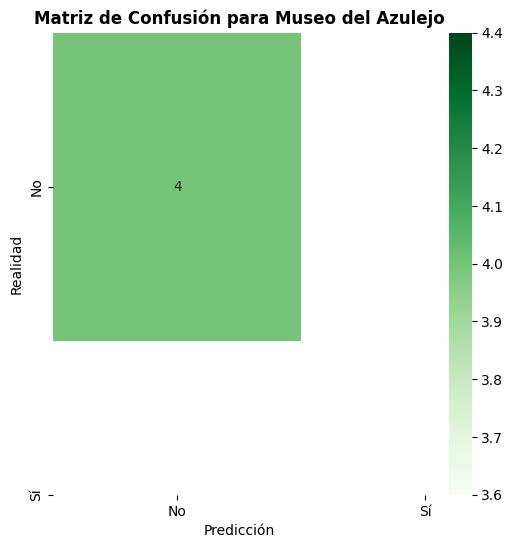

In [24]:
conf_matrix_azulejo = confusion_matrix(y_test_azulejo, y_pred_azulejo)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_azulejo, annot=True, fmt='d', cmap='Greens', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión para Museo del Azulejo', fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


**Análisis:** En este caso la tabla de confusion no funciona debido a que no hay una variable "no" en el resultado de kNN para el museo del Azulejo, lo cual puede significar que el modelo está previendo siempre la misma clase, esto debe darse seguramente debido a que los dataset y las columnas elegidas para alimentar el modelo de predicción no contengan la cantidad suficiente de datos.

#**Conclusiones:**

---



## Distribución de Actividades por Público Destinatario
Se generaron tablas de contingencia que muestran cómo se distribuyen las actividades entre diferentes tipos de público. Este análisis reveló que:

-Las principales actividades en todos los museos son Exposición y Conversatorio.

- Muhar es el unico museo que presento actividades para personas en situación de discapacidad

- Exposición fue la actividad más común para el público Todo público en el museo Subte durante 2023.

- Taller y/o seminario mostró una distribución mixta, con actividades para Adolescentes, Infancia, y Todo público en Subte y MuHar.

- Convocatoria pública y otras actividades como Performance y Visita guiada fueron dirigidas mayormente al público Todo público, y en general las exposiciones son dirigidas a Todo público.

- Subte fue el museo con mayor variedad de actividades tanto en 2023 como en 2024. Esto tiene sentido, considerando que el Museo Subte es un espacio más dinámico, destinado a una mayor variedad de muestras y actividades temporales. A diferencia de MuHar y el Museo del Azulejo, que cuentan con colecciones permanentes y materiales o obras que no pueden ser movidos, Subte ofrece una flexibilidad mayor en su programación. Esto le permite albergar diferentes tipos de eventos y actividades a lo largo del año, adaptándose a diversas temáticas y públicos, lo que se refleja en su amplia oferta.

- Existe una relación significativa entre las actividades y el público destinatario en Subte 2024. Esto sugiere que la programación de actividades en el Museo Subte está influenciada por las características del público, es el unico museo y año en donde es posible visualizar esta relación.
Este patrón es útil porque proporciona una visión clara de cómo se han organizado las actividades en función del público, lo que permite predecir el tipo de público que podría asistir a actividades similares en el futuro.

## Distribución de Actividades por Iniciativa de museo

- Se destaca una marcada diferencia entre las actividades con iniciativa y las sin iniciativa.

- La actividad con mayor iniciativa de parte los museos han sido los conversatorios, seguido por exposiciones aunque esta muestra una tendencia más mixta en los museos analizados.

- Los talleres y/o seminarios parecen ser otra actividad repetida en los tres museos, en donde la iniciativa también es mixta, siendo predominante por parte del museo en Subte 2023 y 2024.

- Del análisis de Chi-cuadrado no se encontro ninguna relación significativa entre estas dos varibles en ninguno de los museos, lo que puede sugerir que no existe una relación lineal, o que es necesaria una mayor cantidad de datos para determinarla.

## Predicciones con kNN
El modelo de kNN se entrenó para predecir el público destinatario de las actividades de los museos, utilizando las características de las actividades pasadas. Sin embargo, los gráficos de distribución de predicciones de kNN mostraron que algunas predicciones no fueron correctas. Por ejemplo:

- En MuHar, algunas predicciones fueron correctas (verdes en el gráfico), pero algunas fueron incorrectas (rojas), lo que podría deberse a una distribución de actividades poco representada en los datos de entrenamiento, o como se menciono anteriormente un dateset con poca cantidad de datos para la utilización de kNN.

- En Subte, la mayoría de las predicciones fueron incorrectas (rojas), lo que indica que el modelo no está alineado con las actividades del museo en cuanto a la distribución del público, esto tiene sentido dado la gran cantidad de actividades que este museo presenta, es probable que mayor cantidad de datos y otro tipo de análisis predictivo sea posible lograr una predicción más acorde.

- En el museo del Azulejo realizo "predicciones correctas" pero no podemos afirmar que sean 100% debido a la imposibilidad de realizar un contraste con la matriz de confusión, como con los otros museos un mayor numero de datos y mejor pulido de los mismos mejore las predicciones significativamente.

## Matriz de Confusión
Se generó una matriz de confusión para cada museo, donde se evaluó el desempeño del modelo de predicción:

- Para Subte 2023 y MuHar 2023, los valores mostraron que el modelo cometió varios errores de predicción

- Sin embargo, para el Museo Azulejo, los datos de las predicciones fueron limitados, lo que resultó en una matriz de confusión casi vacía (solo se predijo un único valor de manera correcta).


## Mejoras a futuro
- Para mejorar el modelo de predicción, sería útil aumentar el tamaño de los datos de entrenamiento y explorar otros algoritmos de aprendizaje supervisado, como Árboles de Decisión o Redes neuronales que debido a las limitaciones de tiempo y experiencia trabajando con prediciones de datos, así como la naturaleza de los data set; no fue posible aplicarlas en este trabajo. Además, la limpieza de datos y la selección de características más relevantes podrían mejorar la precisión del modelo.